# UNIFIED PAYMENT INTERFACE(UPI)


## Agenda of this notebook  
- Data import to pandas
- Top 5 rows 
- Check duplicate values
- Remove/drop unique values
- Checked missing values
- Checked Datatypes
- EDA
- Year/month column
- Mapped the month in MMM format
- Target variable distribution(fraud and not fraud)

## Importing Libraries

In [1]:
%pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collection
- Import Data to notebook
- Pandas for data manipulation

In [3]:
#Reasd csv file
df = pd.read_csv("Sample_data.csv")

In [4]:
# top 5 rows of data
df.head(3)

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25/06/23,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1


In [5]:
df.columns

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                647 non-null    object 
 1   Date                          647 non-null    object 
 2   Time                          647 non-null    object 
 3   Merchant_ID                   647 non-null    object 
 4   Customer_ID                   647 non-null    object 
 5   Device_ID                     647 non-null    object 
 6   Transaction_Type              647 non-null    object 
 7   Payment_Gateway               647 non-null    object 
 8   Transaction_City              647 non-null    object 
 9   Transaction_State             647 non-null    object 
 10  IP_Address                    647 non-null    object 
 11  Transaction_Status            647 non-null    object 
 12  Device_OS                     647 non-null    object 
 13  Trans

Link to understand UPI: https://www.npci.org.in/what-we-do/upi/product-overview

In [7]:
# Descriptive analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Frequency,647.0,3.564142,6.454543,0.00,1.000,2.00,3.00,50.00
Transaction_Amount_Deviation,647.0,5.014668,56.375914,-99.47,-42.355,8.38,52.29,99.45
Days_Since_Last_Transaction,647.0,15.717156,8.218122,1.00,8.500,16.00,23.00,29.00
amount,647.0,128.839753,364.995747,0.12,17.155,35.00,74.77,4883.62
fraud,647.0,0.239567,0.427150,0.00,0.000,0.00,0.00,1.00


# Data Preparation
- Duplicate values
- Missing values
- Unique values
- Removing/dropping Unique values

## Duplicate Values


In [8]:
df.duplicated().sum()

np.int64(0)

There are no Duplicate values in the Dataset

In [9]:
# df.drop_duplicates()

## Missing Values

In [10]:
df.isnull().sum()

Transaction_ID                  0
Date                            0
Time                            0
Merchant_ID                     0
Customer_ID                     0
Device_ID                       0
Transaction_Type                0
Payment_Gateway                 0
Transaction_City                0
Transaction_State               0
IP_Address                      0
Transaction_Status              0
Device_OS                       0
Transaction_Frequency           0
Merchant_Category               0
Transaction_Channel             0
Transaction_Amount_Deviation    0
Days_Since_Last_Transaction     0
amount                          0
fraud                           0
dtype: int64

### How to deal with missing values
- Drop the missing values only if values are very less in proportion
- Amputation (fill back missing values):
  - forward fill
  - backward fill
  - Linear regression
  - Mean value to replace the missing value(not recommended, as mean is sensitive to outliers/normal distribution)
  - Median value to replace missing as it is Robust and not sensitive to outliers, Data ditribution doesnot matter

In [11]:
df.shape

(647, 20)

In [12]:
# Unique values
df.nunique()

Transaction_ID                  647
Date                            302
Time                            641
Merchant_ID                     647
Customer_ID                     647
Device_ID                       647
Transaction_Type                  7
Payment_Gateway                   9
Transaction_City                281
Transaction_State                28
IP_Address                      647
Transaction_Status                3
Device_OS                         4
Transaction_Frequency            14
Merchant_Category                10
Transaction_Channel               3
Transaction_Amount_Deviation    635
Days_Since_Last_Transaction      29
amount                          633
fraud                             2
dtype: int64

## Drop the Unique values from the data as it doesnot contribute to any data nalysis

In [13]:
df.columns

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [14]:
df.drop(['Transaction_ID', 'Customer_ID', 'Device_ID', 'IP_Address'], axis=1, inplace=True)

# drop func doesnot modify original dataset

In [15]:
df.head(2)

,Date,Time,Merchant_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1


## *Data Cleaning and Feature Engineering

In [16]:
# Multiple columns as list within a list
df[['Date', 'amount']]

,Date,amount
0,20/04/23,396.62
1,08/08/23,121.94
2,25/06/23,106.69
3,28/01/24,3611.11
4,21/06/23,374.89
...,...,...
642,24/07/23,28.27
643,05/07/23,26.26
644,16/04/23,6.02
645,28/10/23,17.12


In [17]:
# importing date and time module
import datetime as dt

In [18]:
#convert datatype of Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

### Creating a new Column 'Year' column with help of Datetome Module in py

In [19]:
# Creating new column 'Year' and extracting it from Date column
df['Year'] = df['Date'].dt.year

### Create a month column with month of transactions

In [20]:
# Extracting month from 'Date' Column using Datetime module in py.
df['Month'] = df['Date'].dt.month

In [25]:
df['Month'].unique()

#Sort the series or array in List

df['Month'].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

### Months column to have format 'MMM' as compared to 1-12

In [27]:
# Creating a Dict with key:value pairs for the number of months and their respective names
months = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

In [30]:
# Map the dict to month column
df['Month']= df['Month'].map(months)

In [31]:
df.head()

,Date,Time,Merchant_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-04-20,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,2023-08-08,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,2023-06-25,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,2024-01-28,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,2023-06-21,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [37]:
df.columns

Index(['Merchant_ID', 'Transaction_Type', 'Payment_Gateway',
       'Transaction_City', 'Transaction_State', 'Transaction_Status',
       'Device_OS', 'Transaction_Frequency', 'Merchant_Category',
       'Transaction_Channel', 'Transaction_Amount_Deviation',
       'Days_Since_Last_Transaction', 'amount', 'fraud', 'Year', 'Month'],
      dtype='object')

In [39]:
# Drop the date and time Column
#df.drop(['Date'],axis=1, inplace=True)
#df.drop(['Time'],axis=1, inplace=True)


In [48]:
# fraud and not fraud - count and proportions 
print(df['fraud'].value_counts())
df['fraud'].value_counts(normalize=True)*100

fraud
0    492
1    155
Name: count, dtype: int64


fraud
0    76.043277
1    23.956723
Name: proportion, dtype: float64

<Axes: xlabel='fraud', ylabel='count'>

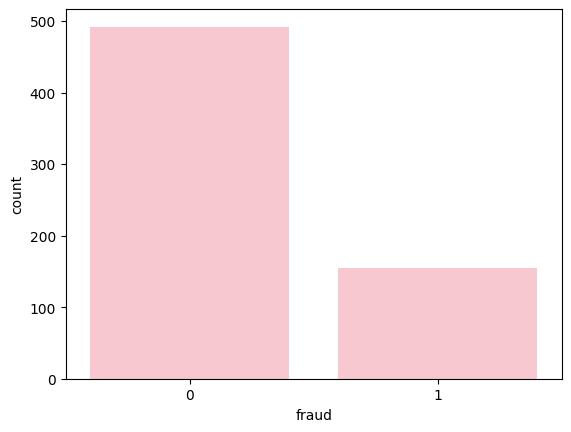

In [49]:
#Visual using seaborn lib for data viz
sns.countplot(data= df, x='fraud', color= 'pink')

### Create separate datasets for normal and fraud transactions

In [53]:
df.columns

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud', 'Year', 'Month'],
      dtype='object')

In [51]:
df.drop(['Merchant_ID'], axis=1, inplace=True)

In [54]:
fraud = df[df['fraud']==1]  # fraud

In [55]:
fraud.head(3)

,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun


In [56]:
fraud.shape

(155, 15)